In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
events_data = pd.read_csv('~/data/event_data_train.csv')
submissions_data = pd.read_csv('~/data/submissions_data_train.csv')

In [3]:
sns.set(rc={'figure.figsize': (9, 6)})

In [4]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data['day'] = events_data.date.dt.date

In [5]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [6]:
users_events_data = events_data.pivot_table(index='user_id',
                       columns='action',
                       values='step_id',
                        aggfunc='count',
                       fill_value=0).reset_index()

In [7]:
users_scores = submissions_data.pivot_table(index='user_id',
                       columns='submission_status',
                       values='step_id',
                        aggfunc='count',
                       fill_value=0).reset_index()

In [8]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [9]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [10]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [11]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [12]:
gap_data = gap_data / (24 * 60 * 60)

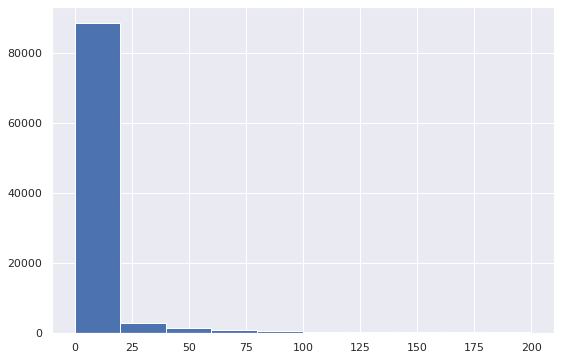

In [13]:
gap_data[gap_data < 200].hist()

In [14]:
gap_data.quantile(0.95)

59.760440972222156

In [15]:
k = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [16]:
def mmm(a):
    q = 0
    t = 1
    for (i, _) in enumerate(a):
        if type(a[i]) is np.ndarray:
            if len(a[i]) > t:
                q = i
                t = len(a[i])
    return q

In [17]:
k

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int64)], dtype=object)

In [18]:
r = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff)

In [19]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [20]:
new_df = submissions_data.pivot_table(index = 'user_id',
                                     columns = 'submission_status',
                                     values = 'step_id',
                                     aggfunc='count')

In [21]:
new_df[new_df['correct'] == new_df['correct'].max()]

submission_status,correct,wrong
user_id,,
1046,421.0,513.0


In [22]:
new_df

submission_status,correct,wrong
user_id,,
2,2.0,NaN
3,29.0,23.0
5,2.0,2.0
8,9.0,21.0
14,NaN,1.0
...,...,...
26787,3.0,NaN
26790,1.0,NaN
26794,33.0,9.0


In [23]:
drop_out_threshold = 30 * 24 * 60 * 60
now = 1526772685

In [24]:
users_data = events_data.groupby('user_id', as_index=False).agg({'timestamp': 'max'}).rename(columns={'timestamp' : 'last_timestamp'})

In [25]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [26]:
users_data

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [27]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [28]:
users_data = users_data.merge(users_scores, how='outer')

In [29]:
users_data = users_data.fillna(0)

In [30]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [31]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [32]:
users_data = users_data.merge(users_events_data, how='outer')

In [33]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [34]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [35]:
users_data = users_data.merge(users_days, how='outer')

In [36]:
#проверка, что никого не потеряли
users_data.user_id.nunique()

19234

In [37]:
events_data.user_id.nunique()

19234

In [38]:
users_data['passed_corse'] = users_data.passed > 170

In [39]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [40]:
#процент пользователей, прошедших курс
100 * 1425 / 17809

8.001572238755685

In [41]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [42]:
users_data[users_data.passed_corse].day.median()

20.0

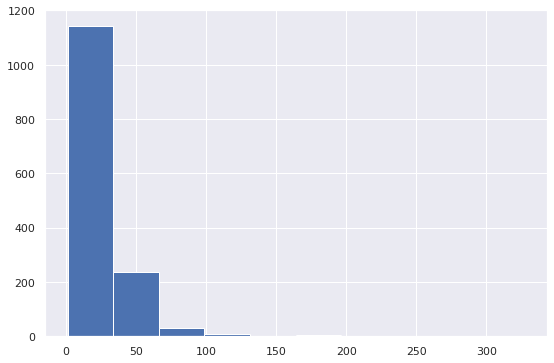

In [43]:
users_data[users_data.passed_corse].day.hist()

In [44]:
user_min_time = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'min'}) \
    .rename({'timestamp': 'min_timestamp'}, axis=1)

In [45]:
users_data = users_data.merge(user_min_time, how='outer')

In [46]:
user_min_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


In [47]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [51]:
events_data.shape

(3480703, 7)

In [52]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [53]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [54]:
#3 дня в секундах
learning_time_threshold = 3 * 24 * 60 * 60

In [55]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [56]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_threshold).map(str)

In [57]:
user_learning_time_threshold.head()

0    1_1473086664
1    2_1514642564
2    3_1434617676
3    5_1466416009
4    7_1521893860
dtype: object

In [58]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [59]:
user_min_time

,user_id,min_timestamp,user_learning_time_threshold
0,1,1472827464,1_1473086664
1,2,1514383364,2_1514642564
2,3,1434358476,3_1434617676
3,5,1466156809,5_1466416009
4,7,1521634660,7_1521893860
...,...,...,...
19229,26790,1451484016,26790_1451743216
19230,26793,1510225031,26793_1510484231
19231,26794,1495287049,26794_1495546249
19232,26797,1508425316,26797_1508684516


In [60]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')

In [61]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [62]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]

In [63]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [64]:
events_data_train.groupby('user_id').day.nunique().max()

4

In [65]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [66]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index() \
    .rename(columns={'day': 'days'})

In [67]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
    .rename(columns={'step_id': 'steps_tried'})

In [68]:
X = X.merge(steps_tried, on="user_id", how="outer")

In [69]:
X.head()

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [70]:
X = X.merge(submissions_data.pivot_table(index='user_id',
                       columns='submission_status',
                       values='step_id',
                        aggfunc='count',
                       fill_value=0).reset_index())

In [72]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [74]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.000000
1,3,1,4,29,23,0.557692
2,8,1,11,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,3,23,77,106,0.420765


In [76]:
X = X.merge(events_data_train.pivot_table(index='user_id',
                       columns='action',
                       values='step_id',
                        aggfunc='count',
                       fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [79]:
X = X.fillna(0)

In [81]:
X = X.merge(users_data[['user_id', 'passed_corse', 'is_gone_user']], how='outer')

In [90]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,,
2,2,1.0,2.0,2.0,0.0,1.000000,9
3,3,1.0,4.0,29.0,23.0,0.557692,20
8,8,1.0,11.0,9.0,21.0,0.300000,154
14,14,1.0,1.0,0.0,1.0,0.000000,9
16,16,3.0,23.0,77.0,106.0,0.420765,132


In [83]:
X = X[~((X.is_gone_user == False) & (X.passed_corse == False))]

In [85]:
X.groupby(['passed_corse', 'is_gone_user']).user_id.count()

passed_corse  is_gone_user
False         True            16560
True          False             141
              True             1284
Name: user_id, dtype: int64

In [92]:
y = X.passed_corse

AttributeError: 'DataFrame' object has no attribute 'passed_corse'

In [93]:
y = y.map(int)

In [87]:
X = X.drop(['passed_corse', 'is_gone_user'], axis=1)

In [91]:
X = X.set_index(X.user_id)
X = X.drop('user_id', axis=1)

In [ ]:
#задание по фильтрации

In [79]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [106]:
new_data =submissions_data

In [99]:
def isWrong(x):
    if x == 'wrong':
        return True
    else:
        return False

In [110]:
new_data_data = submissions_data.groupby('user_id', as_index=False).agg({'timestamp': 'max'}).rename({'timestamp':'max_time'}, axis=1)

In [111]:
new_data = new_data.merge(new_data_data[['user_id', 'max_time']], how='outer')

In [114]:
new_data.head()

,step_id,timestamp,submission_status,user_id,date,day,max_time
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,1479734163
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,1479734163
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11,1479734163
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11,1479734163
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,1479734163


In [118]:
now_ok = new_data[(new_data.timestamp == new_data.max_time) & (new_data.submission_status == 'wrong')]

In [124]:
eee = now_ok.groupby('step_id').agg({'submission_status': 'count'})

In [130]:
eee[eee.submission_status == max(eee.submission_status)]

,submission_status
step_id,
31978,154


In [1]:
events_data.head()

NameError: name 'events_data' is not defined